# Load datasets used to generate figure 1 from "Storms drive CO2 outgasing in the Subpolar Southern Ocean"

Author: Sarah Nicholson

Date: 10 November 2021

In [5]:
%pylab inline
import xarray as xr
import pandas as pd
import cmocean as cm
from cartopy import crs, feature
import xesmf as xe
from cartopy import crs as ccrs, feature as cfeature
import scipy.io as sio
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from cartopy import crs as ccrs, feature as cfeature
import glidertools as gt
import matplotlib.gridspec as gridspec
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Load datasets

## Sea-ice concentration monthly mean

data download available here: 
https://psl.noaa.gov/data/gridded/data.ncep.reanalysis2.gaussian.html

In [ ]:
# This file is made available
data_path = '../DATA/Generalisation/'
ice = xr.open_dataset(data_path + 'icec.sfc.mon.mean.nc')
i = (ice.lat < -50) & (ice.lat > -66)
ice_so = ice.icec[240:-5,i,:]
i = (ice.lat < -50)
ice_so1 = ice.icec[240:-5,i,:]


## Download Glodap data fig 1b,c:
data download: https://www.ncei.noaa.gov/access/ocean-carbon-data-system/oceans/GLODAPv2_2020/

In [43]:
# The user needs to download the GLODAPv2 2020 data:

data_path = 'ADD_YOUR_PATH/'
fname = 'GLODAPv2.2020_Merged_Master_File.csv'
glor = pd.read_csv(data_path+fname)
i = (glor.cruise==1004.0) & (glor.longitude > -0.5) & (glor.longitude < 11 )& (glor.depth < 600 )

ghl=glor[i].copy()
ghl.tco2[ghl.tco2 < 0] = np.nan
ghl.temperature[ghl.temperature < -100] = np.nan
ghl.salinity[ghl.salinity < -100] = np.nan
ghl1 = ghl.to_xarray()
ghl['density'] = gt.physics.potential_density(ghl1.salinity, ghl1.temperature,ghl1.depth,ghl1.latitude,ghl1.longitude)#.values
ghl1['density'] = gt.physics.potential_density(ghl1.salinity, ghl1.temperature,ghl1.depth,ghl1.latitude,ghl1.longitude)#.values


In [32]:
# grid data using glidertool functionality 
dic_lat_grid = gt.grid_data(ghl1.latitude,ghl1.depth,ghl1.tco2,bins=np.arange(0,600,20))
density_lat_grid = gt.grid_data(ghl1.latitude,ghl1.depth,ghl1.density,bins=np.arange(0,600,20))
ta_lat_grid = gt.grid_data(ghl1.latitude,ghl1.depth,ghl1.talk,bins=np.arange(0,600,20))

In [31]:
# function to find isopycnal
ref_eps = 1026.5
def find_ref_iso(eps, depth, ref_eps=1026.4 ):
    if eps.size==0: # for empty
        return nan
    else: absdiff = np.abs(eps - ref_eps)
    eps_idx = absdiff.idxmin()
    ref_depth = depth[eps_idx]
    if isnan(eps).all():
        return nan
    else:
         return ref_depth

# FIgure 1 Contextualize

## CSIRML6 pco2
download data: https://figshare.com/articles/dataset/Global_surface_ocean_pCO2_from_CSIR-ML6_2020a_/12652100/4

In [44]:
# User needs to first download CSIR-ML6

data_path='ADD_YOUR_PATH/'
fname = 'CSIR-ML6_CO2_1982-2019_figshare.nc'
lg_co2 = xr.open_mfdataset(data_path+fname,combine='by_coords')
i= (lg_co2.lat < -5) & (lg_co2.lat > -90) 
# select 2005-2019
lg_co21 = lg_co2.fgco2[276:,i,:] 
seasonco2 = lg_co2.fgco2[276:,i,:].groupby('time.season').mean('time')
lg_dpco21 = lg_co2.spco2[276:,i,:] 
seasondpco2 = lg_dpco21.groupby('time.season').mean('time')

In [45]:
lg_dpco21

<xarray.DataArray 'spco2' (time: 180, lat: 85, lon: 360)>
dask.array<getitem, shape=(180, 85, 360), dtype=float64, chunksize=(180, 85, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... -8.5 -7.5 -6.5 -5.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 2005-01-01 2005-02-01 ... 2019-12-01
Attributes:
    long_name:      sea surface partial pressure of CO2
    units:          uatm
    description:    The mean of a selection of machine learning methods liste...
    standard_name:  partial_pressure_of_carbon_dioxide_in_sea_water

# Load WG data processed


In [39]:
WG = pd.read_csv('../Data/SOSCEx_STORM2_Glider_Data/WG_and_timeseries_nicholson_etal_2021.csv')

# Subpolar region mask 


In [36]:
m = xr.open_dataarray('../Data/Generalisation/zonal_masked_region.nc')
m = m[4:,:] 

# FIGURE 1

In [37]:
cm11 = 1/2.54  # centimeters in inches
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 7
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator(interval=1)
days = mdates.DayLocator(interval=1)
hrs = mdates.HourLocator(interval=1)
daysFmt = mdates.DateFormatter("%h")
yearsFmt = mdates.DateFormatter("%d\%m")

/home/snicholson1/.conda/envs/py3/lib/python3.7/site-packages/ipykernel/__main__.py:43: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



Text(0, 0.5, '$\\mu$atm')

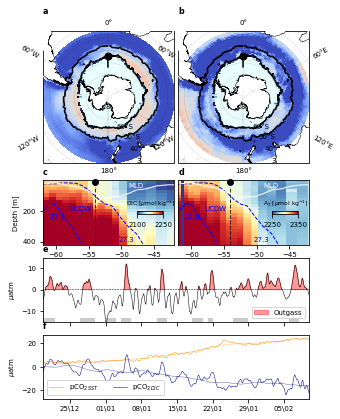

In [38]:
#fontsize
fig = plt.figure(figsize=(12.1*cm11,18*cm11))
gs = gridspec.GridSpec(nrows=5, ncols=4)
tf = 7
latpos=55
rcParams['pcolor.shading']
fname = '/home/snicholson1/.local/share/cartopy/shapefiles/natural_earth/physical/10m_coastline.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                 ccrs.PlateCarree(), lw=.5, edgecolor='k', facecolor='white')


#------- (a)  ------------------------
ax = fig.add_subplot(gs[0:2, 0:2],projection = ccrs.Stereographic(central_latitude=-90))
from cartopy.util import add_cyclic_point
dataco2, lon1 = add_cyclic_point(lg_co21.mean('time')*86400*365, lg_co21.lon)
mesh=ax.pcolormesh(lon1,lg_co21.lat[0:latpos],dataco2[0:latpos,:],vmin=-2,vmax=2,cmap='coolwarm',shading='auto',transform = ccrs.PlateCarree(),zorder=-1)
ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())
ax.add_feature(shape_feature, zorder=100)
ax.contour(m.lon,m.lat,m,1 ,transform = ccrs.PlateCarree(),zorder=100,linewidths=1,colors='black')
ax.pcolormesh(ice.lon,ice.lat[68:],np.ma.masked_less(ice.icec[470:480,68:,:].max('time'),.05),cmap=cm.cm.ice,transform = ccrs.PlateCarree(),zorder=1);#plt.colorbar()
ax.plot(0,-54,marker='o',markersize=7,color='k',transform = ccrs.PlateCarree(),zorder=200)
ax.set_title('a',fontweight='bold',loc='left',zorder=250,fontsize=8)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.2, color='black', alpha=0.5, linestyle='--',draw_labels='True') 

#------- (b)  ------------------------
ax = fig.add_subplot(gs[0:2, 2:4],projection = ccrs.Stereographic(central_latitude=-90))
dataco2, lon1 = add_cyclic_point(lg_co21[167:170,::].mean('time')*86400*365, lg_co21.lon)
mesh=ax.pcolormesh(lon1,lg_co21.lat[:latpos],dataco2[:latpos,:],vmin=-2,vmax=2,cmap='coolwarm',shading='auto',transform = ccrs.PlateCarree(),zorder=-1)
ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())
ax.add_feature(shape_feature, zorder=300)
data, lon = add_cyclic_point(np.ma.masked_less(ice_so1[72:,::].mean('time'),0.1), ice_so1.lon)
ax.contour(m.lon,m.lat,m,1 ,transform = ccrs.PlateCarree(),zorder=100,linewidths=1,colors='black')
ax.pcolormesh(ice.lon,ice.lat[68:],np.ma.masked_less(ice.icec[470:480,68:,:].max('time'),.05),cmap=cm.cm.ice,transform = ccrs.PlateCarree(),zorder=1);#plt.colorbar()
ax.grid()
ax.plot(0,-54,marker='o',markersize=7,color='k',transform = ccrs.PlateCarree(),zorder=201)
ax.set_title('b',fontweight='bold',loc='left',zorder=280,fontsize=8)
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.2, color='black', alpha=0.5, linestyle='--',draw_labels='True') 


#------- (c)  ------------------------
ax3 = fig.add_subplot(gs[2, 0:2])
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cm1 = ax3.pcolormesh(dic_lat_grid.latitude,dic_lat_grid.depth,dic_lat_grid.values,vmin=2100,vmax=2250,cmap='RdYlBu_r')#'RdYlBu_r');#plt.colorbar()
axins1 = inset_axes(ax3,
                    width="20%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='center right',
                    borderpad=1.5)
cbar=fig.colorbar(cm1, cax=axins1,orientation='horizontal',ticks=[2100,2250])
grp = ghl.groupby('latitude')
cbar.ax.set_title('DIC [$\mu$mol kg$^{-1}$]',fontsize=6)
ref_eps = 1027.3
gd_iso_275 = grp.apply(lambda s: find_ref_iso(s.density.dropna(), s.depth, ref_eps))
ax3.plot(gd_iso_275.rolling(4,center=True).mean().ffill(),color='b',lw=1,ls='--')
ref_eps = 1027.8
gd_iso_275 = grp.apply(lambda s: find_ref_iso(s.density.dropna(), s.depth, ref_eps))
ax3.plot(gd_iso_275.rolling(4,center=True).mean().bfill(),color='b',lw=1,ls='--')
ax3.axvline(x=-54,ymin=0,ymax=1,color='k',lw=1,alpha=0.8,ls='--')
mld_dgap = gt.physics.mixed_layer_depth(ghl.latitude,ghl.depth,ghl.density,thresh=0.03)
ax3.plot(mld_dgap.rolling(4,center=True).mean().ffill().bfill(),color='white',lw=1)
ax3.set_xlabel('Latitude [˚S]')
ax3.set_ylabel('Depth [m]')
ax3.text(-49,50,'MLD',color='white')
ax3.text(-50.5,400,'27.3',color='blue')
ax3.text(-61,250,'27.8',color='blue')
ax3.text(-58,200,'UCDW',color='blue')
ax3.plot(-54,10,marker='o',markersize=8,color='k',clip_on=False,markeredgecolor='white')
ax3.set_xlim(-62,-42)
ax3.set_ylim(420,2)
ax3.set_title('c ',loc='left',fontweight='bold',fontsize=8)
plt.gcf().subplots_adjust(bottom=0.15)

#------- (d)  ------------------------

ax3 = fig.add_subplot(gs[2, 2:4])
cm1 = ax3.pcolormesh(ta_lat_grid.latitude,ta_lat_grid.depth,ta_lat_grid,vmin=2250,vmax=2350,cmap='RdYlBu_r',shading='auto');#plt.colorbar()
axins1 = inset_axes(ax3,
                    width="20%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='center right',
                    borderpad=1.5)
cbar = fig.colorbar(cm1, cax=axins1,orientation='horizontal',ticks=[2250,2350])
cbar.ax.set_title('A$_{T}$ [$\mu$mol kg$^{-1}$]',fontsize=6)
grp = ghl.groupby('latitude')
ref_eps = 1027.3
gd_iso_275 = grp.apply(lambda s: find_ref_iso(s.density.dropna(), s.depth, ref_eps))
ax3.plot(gd_iso_275.rolling(4,center=True).mean().ffill(),color='b',lw=1,ls='--')
ref_eps = 1027.8
gd_iso_275 = grp.apply(lambda s: find_ref_iso(s.density.dropna(), s.depth, ref_eps))
ax3.plot(gd_iso_275.rolling(4,center=True).mean().bfill(),color='b',lw=1,ls='--')
ax3.axvline(x=-54,ymin=0,ymax=1,color='k',lw=1,alpha=0.8,ls='--')
mld_dgap = gt.physics.mixed_layer_depth(ghl.latitude,ghl.depth,ghl.density,thresh=0.03)
ax3.plot(mld_dgap.rolling(4,center=True).mean().ffill().bfill(),color='white',lw=1)
ax3.set_xlabel('Latitude [˚S]')
ax3.text(-49,50,'MLD',color='white')
ax3.text(-50.5,400,'27.3',color='blue')
ax3.text(-61,250,'27.8',color='blue')
ax3.text(-58,200,'UCDW',color='blue')
ax3.plot(-54,10,marker='o',markersize=8,color='k',clip_on=False,markeredgecolor='white')
ax3.set_xlim(-62,-42)
ax3.set(yticklabels=[]) 
ax3.set_ylim(420,2)
ax3.tick_params(left=False)
ax3.set_title('d',fontweight='bold',loc='left',fontsize=8)
plt.gcf().subplots_adjust(bottom=0.15)
plt.subplots_adjust(wspace=0.07)


#-----------(e)-----------------
ax1 = fig.add_subplot(gs[3:4, 0:4])
yearsFmt1 = mdates.DateFormatter("%d\%m")
dpco2 = WG.pCO2sea_uatm-WG.pCO2atm_uatm
plot(pd.to_datetime(WG.Date),dpco2.rolling(8,center=True,min_periods=2).mean(),color='k',lw=.5,label='')
plot(pd.to_datetime(WG.Date),dpco2*0,color='k',ls='--',label='',lw=0.5)
plt.fill_between(pd.to_datetime(WG.Date), 0, dpco2.rolling(8,center=True,min_periods=2).mean(), where=dpco2.rolling(8,center=True,min_periods=2).mean()>0, interpolate=True,color='red',alpha=0.4,label='Outgass',lw=1)
plt.legend(ncol=2,loc=4,fontsize=7)
plt.ylabel('$\mu$atm')
ax1.xaxis.set_major_locator(weeks)
ax1.xaxis.set_major_formatter(yearsFmt)
plt.ylim([-18, 18])
plt.title('')
plt.ylim(-15,15)
plt.axvspan(pd.to_datetime('2018-12-19'), pd.to_datetime('2018-12-22'),0,.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2018-12-27'), pd.to_datetime('2018-12-30'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-01'), pd.to_datetime('2019-01-03'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-04'), pd.to_datetime('2019-01-06'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-11'), pd.to_datetime('2019-01-13'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-18'), pd.to_datetime('2019-01-20'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-26'), pd.to_datetime('2019-01-29'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-01-21'), pd.to_datetime('2019-01-22'),0,0.06, facecolor='k', alpha=0.2)
plt.axvspan(pd.to_datetime('2019-02-06'), pd.to_datetime('2019-02-08'),0,0.06, facecolor='k', alpha=0.2)
ax1.xaxis.set_major_formatter(yearsFmt1)
ax1.xaxis.set_major_locator(weeks)
plt.xlim(pd.to_datetime(WG.Date.values[10]),pd.to_datetime(WG.Date.values[-50]))
ax1.tick_params(labelbottom=False) 
plt.ylim(-15,15)
plt.title('e',fontweight='bold',loc='left',fontsize=8)

#------------(f)------------------------:
ax1 = fig.add_subplot(gs[4:5, 0:4])
plot(pd.to_datetime(WG.Date),WG.PCO2_SST_muatm.rolling(24,center=True,min_periods=2).mean(),color='darkorange',label='pCO$_{2SST}$',lw=.5)
plot(pd.to_datetime(WG.Date),WG.PCO2_SST_muatm.rolling(10*24,center=True,min_periods=2).mean(),color='darkorange',label='',alpha=0.5,lw=.5)
plot(pd.to_datetime(WG.Date),WG.PCO2_DIC_muatm.rolling(8,center=True,min_periods=2).mean(),color='darkblue',label='pCO$_{2DIC}$',lw=.5)
plot(pd.to_datetime(WG.Date),WG.PCO2_DIC_muatm.rolling(10*24,center=True,min_periods=2).mean(),color='darkblue',label='',alpha=0.6,lw=.5)
plt.ylabel(' \muatm')
plt.ylim(-27,27)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_major_locator(weeks)
plt.xlim(pd.to_datetime(WG.Date.values[10]),pd.to_datetime(WG.Date.values[-50]))
plt.legend(ncol=2,fontsize=7,loc=3)
plt.title('f',fontweight='bold',loc='left',fontsize=8)
plt.ylabel('$\mu$atm')

#plt.savefig('Figure_1_Nicholson_NatComms.pdf')


